<a href="https://colab.research.google.com/github/gabrielerrera/DataScience/blob/master/financial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [0]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2020, 5, 22)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

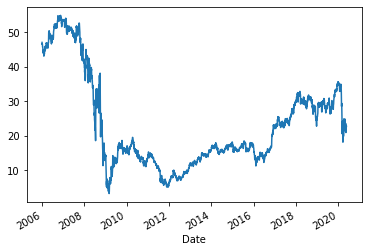

In [25]:
BAC['Close'].plot()

In [0]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [0]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [0]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [29]:
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.408512
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.171795
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.149401
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.267757
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.264565

[5 rows x 36 columns]

In [30]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

In [0]:
returns = pd.DataFrame()

In [32]:
for tick in tickers:
  returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


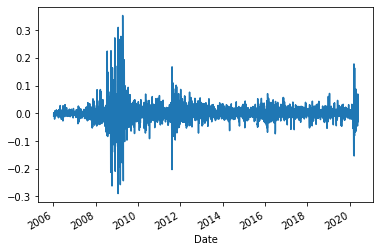

In [33]:
returns['BACReturn'].plot()

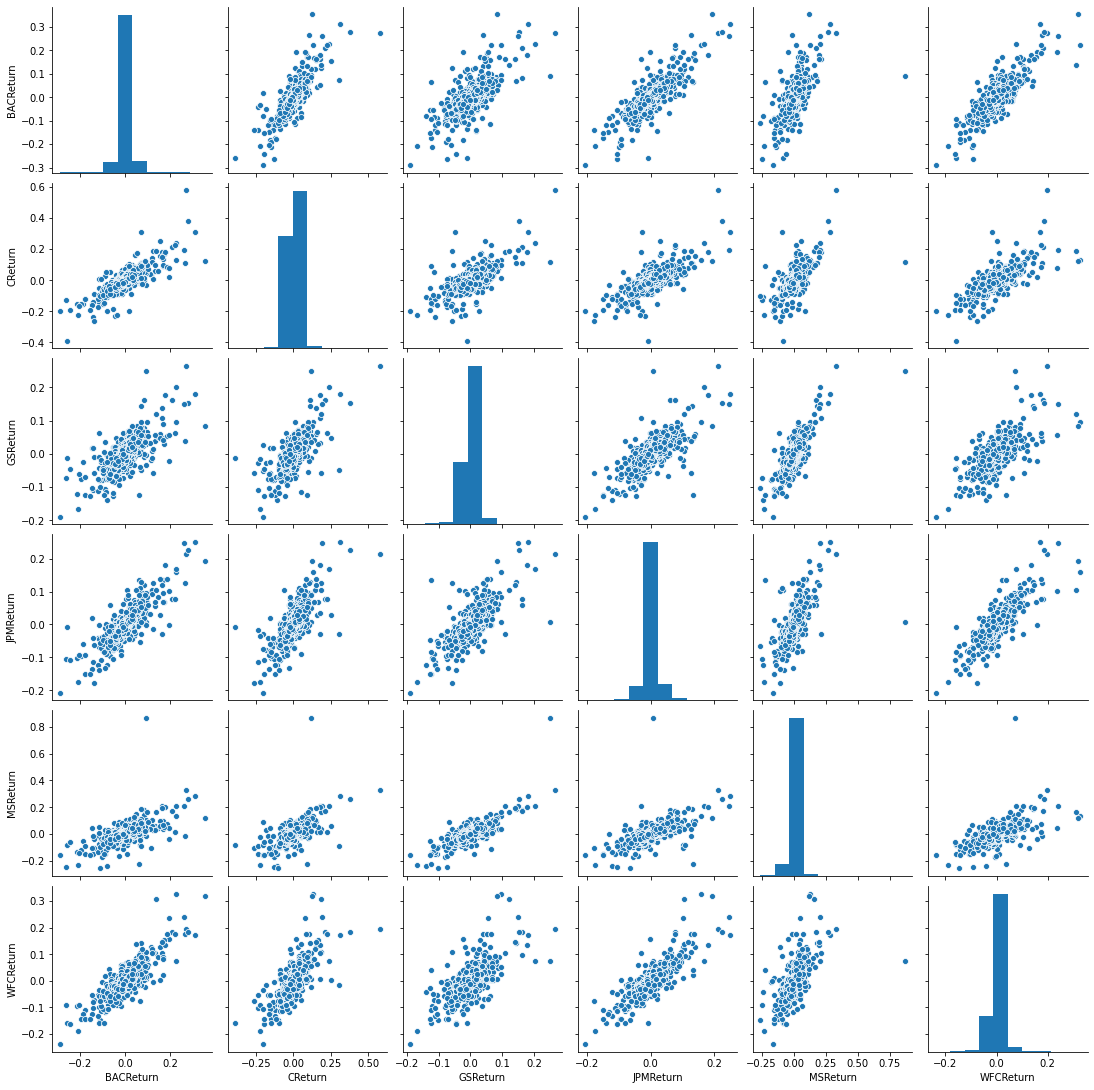

In [34]:
import seaborn as sns
sns.pairplot(returns[1:])

In [39]:
print(returns['BACReturn'].min())
returns.idxmin() 


-0.2896935896149381


BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [40]:
print(returns['BACReturn'].max())
returns.idxmax()

0.35269125610998264


BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [41]:
returns.std()

BACReturn    0.032718
CReturn      0.034556
GSReturn     0.023746
JPMReturn    0.025224
MSReturn     0.033729
WFCReturn    0.027424
dtype: float64

In [44]:
returns.index.date >= datetime.date(2015, 1 ,1)

array([False, False, False, ...,  True,  True,  True])

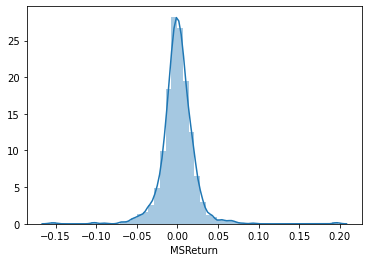

In [51]:
sns.distplot(returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2020, 5, 22))]['MSReturn'])

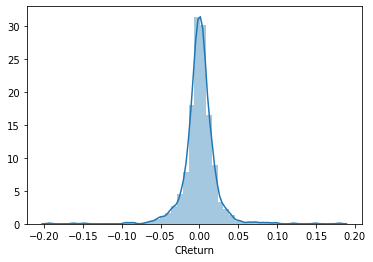

In [52]:
sns.distplot(returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2020, 5, 22))]['CReturn'])

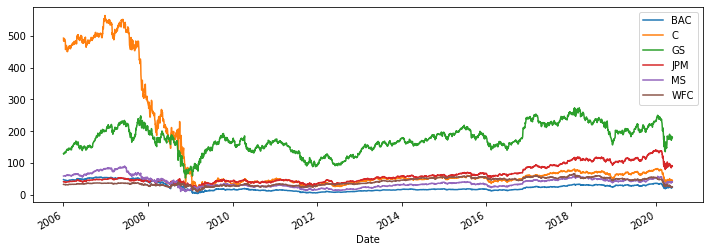

In [59]:
for tick in tickers:
  bank_stocks[tick]['Close'].plot(figsize=(12, 4), label=tick)
plt.legend()

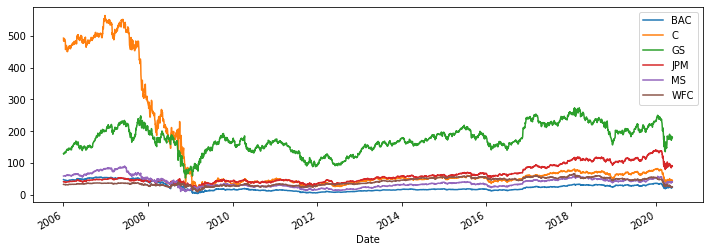

In [62]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).plot(figsize=(12, 4), label=tick)
plt.legend()

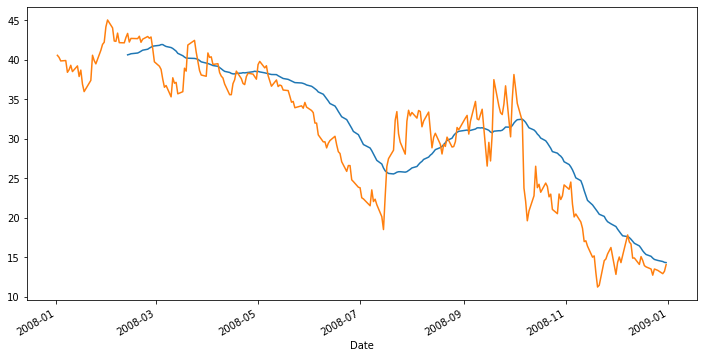

In [77]:
plt.figure(figsize=(12, 6))
BAC2008 = BAC['Close'][BAC.index.year == 2008]
BAC2008_media_movel = BAC2008.rolling(window=30).mean().plot()
BAC2008.plot()


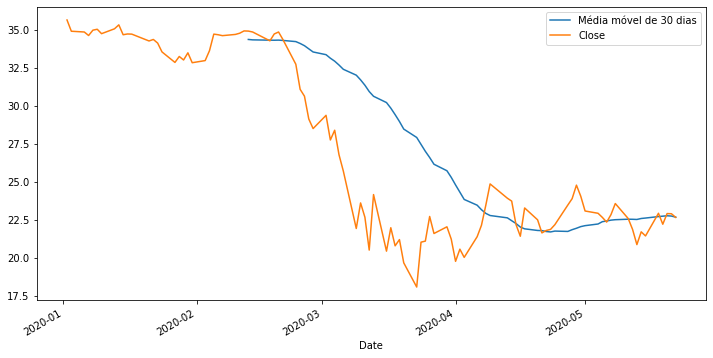

In [80]:
plt.figure(figsize=(12, 6))
BAC2020 = BAC['Close'][BAC.index.year == 2020]
BAC2020_media_movel = BAC2020.rolling(window=30).mean().plot(label='Média móvel de 30 dias')
BAC2020.plot()
plt.legend()

In [0]:
corr_matrix = bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr()

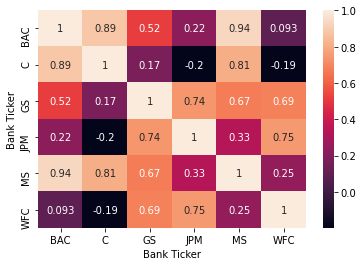

In [84]:
sns.heatmap(corr_matrix, annot=True)

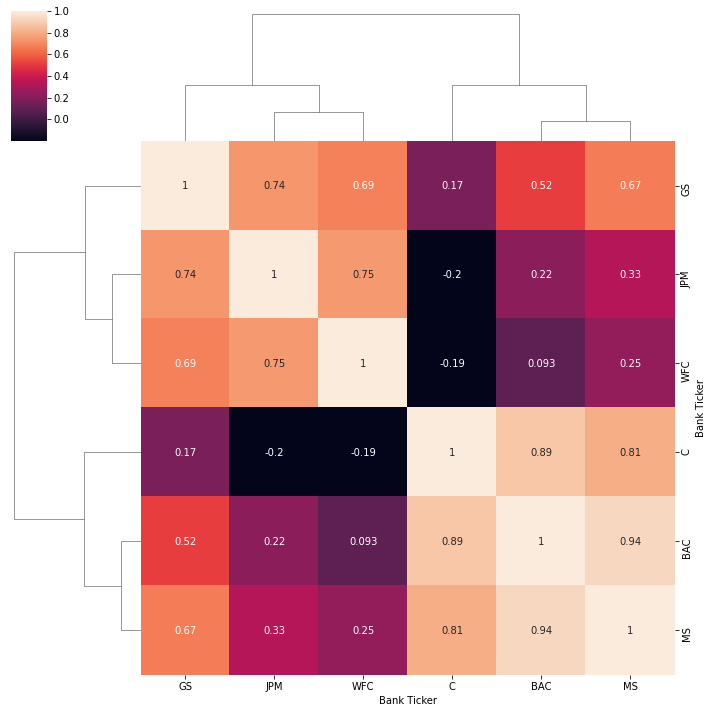

In [85]:
sns.clustermap(corr_matrix, annot=True)